In [136]:
import matplotlib.pyplot as plt

import torch

# One sided distribution: importance calculation

Domains A and B contain digits with class [0-9]. They have have the following distributions:

In [272]:
p_A = torch.Tensor([0.2, 0.8])
p_A /= p_A.sum()

p_B = torch.Tensor([0.5, 0.5])
p_B /= p_B.sum()

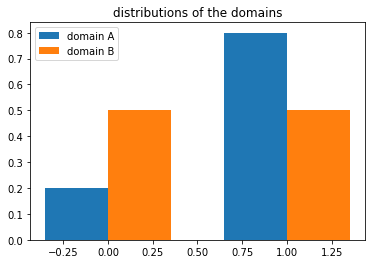

In [274]:
width = 0.35

plt.title('distributions of the domains')
plt.bar(torch.arange(len(p_A)) - width/2, p_A, width)
plt.bar(torch.arange(len(p_B)) + width/2, p_B, width)
plt.legend(['domain A', 'domain B'])
plt.show()

The multiplication factor for each of the classes for domain A is as following:

In [275]:
m = p_B / p_A

print(m.view(-1,1))
print()
print('sum:', m.sum().item())

tensor([[2.5000],
        [0.6250]])

sum: 3.125


### Normalization
The importances have to sum up to 1 so that we can weight or sample.

The problem I am facing here is that I don't know how to properly normalize: 
* The sum of the multiplication factor is more than 10, meaning that applying softmax or dividing by the sum results in the classes 2-9 getting lower importance even though they should be unaffected.
* Using softmax normalization or dividing by the sum results in the correction not being accurate.

In [276]:
softmax = torch.nn.Softmax(0)
softmax_nm = softmax(m)

sum_nm = m/m.sum()

len_nm = m/len(m)


softmax_nm, sum_nm, len_nm

(tensor([0.8670, 0.1330]), tensor([0.8000, 0.2000]), tensor([1.2500, 0.3125]))

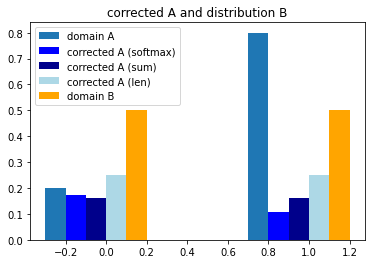

In [299]:
width = 0.1

plt.title('corrected A and distribution B')
plt.bar(torch.arange(len(p_A)) - 2.5*width, p_A, width)
plt.bar(torch.arange(len(p_A)) - 1.5*width, softmax_nm * p_A, width, color='blue')
plt.bar(torch.arange(len(p_A)) - width/2, sum_nm * p_A, width, color='darkblue')
plt.bar(torch.arange(len(p_A)) + width/2, len_nm * p_A, width, color='lightblue')
plt.bar(torch.arange(len(p_B)) + 1.5*width, p_B, width, color='orange')

plt.legend(['domain A', 'corrected A (softmax)', 'corrected A (sum)', 'corrected A (len)', 'domain B'])
plt.show()

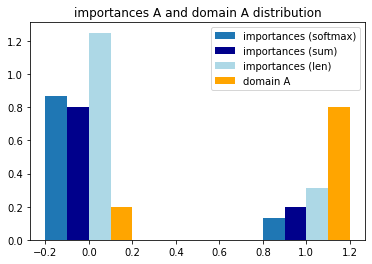

In [300]:
width = 0.1

plt.title('importances A and domain A distribution')
plt.bar(torch.arange(len(p_A)) - 1.5*width, softmax_nm, width)
plt.bar(torch.arange(len(p_A)) - width/2, sum_nm, width, color='darkblue')
plt.bar(torch.arange(len(p_A)) + width/2, len_nm, width, color='lightblue')
plt.bar(torch.arange(len(p_A)) + 1.5*width, p_A, width, color='orange')

plt.legend(['importances (softmax)', 'importances (sum)', 'importances (len)', 'domain A'])
plt.show()

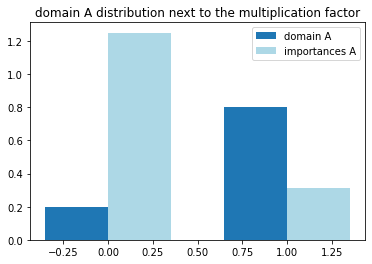

In [281]:
width = 0.35

plt.title('domain A distribution next to the multiplication factor')
plt.bar(torch.arange(len(p_A)) - width/2, p_A, width)
plt.bar(torch.arange(len(p_A)) + width/2, len_nm, width, color='lightblue')
plt.legend(['domain A', 'importances A'])
plt.show()

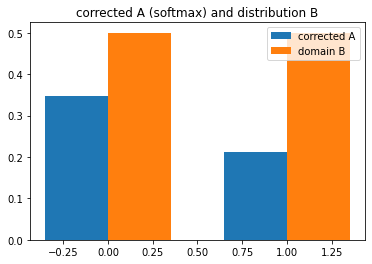

In [303]:
width = 0.35

plt.title('corrected A (softmax) and distribution B')
plt.bar(torch.arange(len(p_A)) - width/2, softmax_nm * p_A * len(p_A), width)
plt.bar(torch.arange(len(p_A)) + width/2, p_B, width)

plt.legend(['corrected A', 'domain B'])
plt.show()

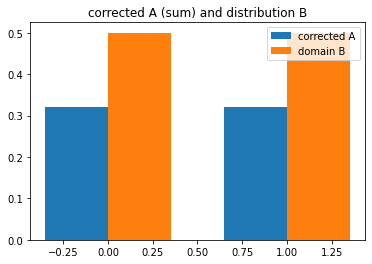

In [304]:
width = 0.35

plt.title('corrected A (sum) and distribution B')
plt.bar(torch.arange(len(p_A)) - width/2, sum_nm * p_A * len(p_A), width)
plt.bar(torch.arange(len(p_A)) + width/2, p_B, width)

plt.legend(['corrected A', 'domain B'])
plt.show()

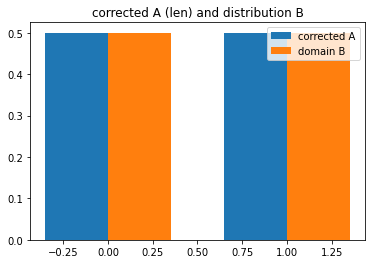

In [302]:
width = 0.35

plt.title('corrected A (len) and distribution B')
plt.bar(torch.arange(len(p_A)) - width/2, len_nm * p_A * len(p_A), width)
plt.bar(torch.arange(len(p_A)) + width/2, p_B, width)

plt.legend(['corrected A', 'domain B'])
plt.show()